<a href="https://colab.research.google.com/github/Ziadabdelsalam/PyCaret-Fintech-Churn-Prediction/blob/main/PyCaret_Churn_Prediction_Geidea_Final_31_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret
!pip install pycaret[mlops]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.3 MB/s eta 0:0

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
# Mount the Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Navigate to the folder where the dataset is located
%cd /content/drive/My Drive/Geidea




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Geidea


In [ ]:
# Read the dataset
data = pd.read_csv(r"/content/drive/MyDrive/Geidea/Churn Model /Untitled folder/Churn Data 2nd approach 10.2023.csv")

# Print the first few rows of the dataset
data.head()

,index(),COALESCE_ORGS,BUSINESSTYPE,BUSINESS_DOMAIN,ACTUAL_AMOUNT,DAYS_SINCE_LAST_TXN,EFFICIENCY,PREVIOUS_CHURN_INCIDENTS,TOTAL_POS_COUNT,TXN_COUNT,CHURNED,MONTH,MAX_DATE,LAST_CHURN_MONTH
0,1,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,NaN,NaN,NaN,0.0,5.0,NaN,3,2/1/2023 0:00,NaN,2/1/2023 0:00
1,2,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,6245.00,0.0,0.61,0.0,5.0,50.0,0,2/1/2021 0:00,2/28/2021 0:00,NaN
2,3,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,10640.00,0.0,0.97,0.0,5.0,183.0,0,9/1/2021 0:00,9/30/2021 0:00,NaN
3,4,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,10830.15,3.0,0.84,0.0,5.0,202.0,1,1/1/2023 0:00,1/28/2023 0:00,NaN
4,5,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,12331.00,0.0,1.00,0.0,5.0,208.0,0,8/1/2021 0:00,8/31/2021 0:00,NaN


In [ ]:
data.isnull().sum()

index()                          0
COALESCE_ORGS                    0
BUSINESSTYPE                 72777
BUSINESS_DOMAIN               6249
ACTUAL_AMOUNT               140904
DAYS_SINCE_LAST_TXN         109155
EFFICIENCY                  140904
PREVIOUS_CHURN_INCIDENTS         0
TOTAL_POS_COUNT                147
TXN_COUNT                   140904
CHURNED                          0
MONTH                            0
MAX_DATE                    109155
LAST_CHURN_MONTH            762653
dtype: int64

In [ ]:
data = data[data['CHURNED'] != 3]
data.head()

,index(),COALESCE_ORGS,BUSINESSTYPE,BUSINESS_DOMAIN,ACTUAL_AMOUNT,DAYS_SINCE_LAST_TXN,EFFICIENCY,PREVIOUS_CHURN_INCIDENTS,TOTAL_POS_COUNT,TXN_COUNT,CHURNED,MONTH,MAX_DATE,LAST_CHURN_MONTH
1,2,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,6245.00,0.0,0.61,0.0,5.0,50.0,0,2/1/2021 0:00,2/28/2021 0:00,NaN
2,3,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,10640.00,0.0,0.97,0.0,5.0,183.0,0,9/1/2021 0:00,9/30/2021 0:00,NaN
3,4,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,10830.15,3.0,0.84,0.0,5.0,202.0,1,1/1/2023 0:00,1/28/2023 0:00,NaN
4,5,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,12331.00,0.0,1.00,0.0,5.0,208.0,0,8/1/2021 0:00,8/31/2021 0:00,NaN
5,6,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,13337.00,0.0,1.00,0.0,5.0,200.0,0,10/1/2021 0:00,10/31/2021 0:00,NaN


In [ ]:
data.drop(columns=['LAST_CHURN_MONTH', 'index()'], inplace=True)

<ipython-input-7-e68b5ce98367>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['LAST_CHURN_MONTH', 'index()'], inplace=True)


In [ ]:
data.head()

,COALESCE_ORGS,BUSINESSTYPE,BUSINESS_DOMAIN,ACTUAL_AMOUNT,DAYS_SINCE_LAST_TXN,EFFICIENCY,PREVIOUS_CHURN_INCIDENTS,TOTAL_POS_COUNT,TXN_COUNT,CHURNED,MONTH,MAX_DATE
1,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,6245.00,0.0,0.61,0.0,5.0,50.0,0,2/1/2021 0:00,2/28/2021 0:00
2,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,10640.00,0.0,0.97,0.0,5.0,183.0,0,9/1/2021 0:00,9/30/2021 0:00
3,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,10830.15,3.0,0.84,0.0,5.0,202.0,1,1/1/2023 0:00,1/28/2023 0:00
4,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,12331.00,0.0,1.00,0.0,5.0,208.0,0,8/1/2021 0:00,8/31/2021 0:00
5,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,NaN,Women's Ready-to-Wear Stores,13337.00,0.0,1.00,0.0,5.0,200.0,0,10/1/2021 0:00,10/31/2021 0:00


In [ ]:
data['BUSINESSTYPE'].fillna('OTHERS', inplace=True)
data['DAYS_SINCE_LAST_TXN'].fillna(7, inplace=True)
data['ACTUAL_AMOUNT'] = data['ACTUAL_AMOUNT'].astype(float)
data.head()

,COALESCE_ORGS,BUSINESSTYPE,BUSINESS_DOMAIN,ACTUAL_AMOUNT,DAYS_SINCE_LAST_TXN,EFFICIENCY,PREVIOUS_CHURN_INCIDENTS,TOTAL_POS_COUNT,TXN_COUNT,CHURNED,MONTH,MAX_DATE
1,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,OTHERS,Women's Ready-to-Wear Stores,6245.00,0.0,0.61,0.0,5.0,50.0,0,2/1/2021 0:00,2/28/2021 0:00
2,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,OTHERS,Women's Ready-to-Wear Stores,10640.00,0.0,0.97,0.0,5.0,183.0,0,9/1/2021 0:00,9/30/2021 0:00
3,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,OTHERS,Women's Ready-to-Wear Stores,10830.15,3.0,0.84,0.0,5.0,202.0,1,1/1/2023 0:00,1/28/2023 0:00
4,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,OTHERS,Women's Ready-to-Wear Stores,12331.00,0.0,1.00,0.0,5.0,208.0,0,8/1/2021 0:00,8/31/2021 0:00
5,0a0aa96a-0e4c-4b88-afd3-42999acfe4e7,OTHERS,Women's Ready-to-Wear Stores,13337.00,0.0,1.00,0.0,5.0,200.0,0,10/1/2021 0:00,10/31/2021 0:00


In [ ]:
data.dropna(inplace=True)
data.isnull().sum()


COALESCE_ORGS               0
BUSINESSTYPE                0
BUSINESS_DOMAIN             0
ACTUAL_AMOUNT               0
DAYS_SINCE_LAST_TXN         0
EFFICIENCY                  0
PREVIOUS_CHURN_INCIDENTS    0
TOTAL_POS_COUNT             0
TXN_COUNT                   0
CHURNED                     0
MONTH                       0
MAX_DATE                    0
dtype: int64

In [ ]:
len(data)

727607

In [ ]:
data = data[data['BUSINESSTYPE']!= 'SOLE_TRADER']
data.drop(columns={'BUSINESSTYPE', 'COALESCE_ORGS'}, inplace=True)

#Convert the 'MONTH' column to datetime
data['MONTH'] = pd.to_datetime(data['MONTH'])

# Split the data into test and training sets
test_data = data[data['MONTH'].dt.to_period('M') == pd.Period('2023-9')]
training_data = data[data['MONTH'].dt.to_period('M') < pd.Period('2023-9')]


<ipython-input-15-28445e559f02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns={'BUSINESSTYPE', 'COALESCE_ORGS'}, inplace=True)
<ipython-input-15-28445e559f02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MONTH'] = pd.to_datetime(data['MONTH'])


In [ ]:
training_data.head(30)

,BUSINESS_DOMAIN,ACTUAL_AMOUNT,DAYS_SINCE_LAST_TXN,EFFICIENCY,PREVIOUS_CHURN_INCIDENTS,TOTAL_POS_COUNT,TXN_COUNT,CHURNED,MONTH,MAX_DATE
1,Women's Ready-to-Wear Stores,6245.00,0.0,0.61,0.0,5.0,50.0,0,2021-02-01,2/28/2021 0:00
2,Women's Ready-to-Wear Stores,10640.00,0.0,0.97,0.0,5.0,183.0,0,2021-09-01,9/30/2021 0:00
3,Women's Ready-to-Wear Stores,10830.15,3.0,0.84,0.0,5.0,202.0,1,2023-01-01,1/28/2023 0:00
4,Women's Ready-to-Wear Stores,12331.00,0.0,1.00,0.0,5.0,208.0,0,2021-08-01,8/31/2021 0:00
5,Women's Ready-to-Wear Stores,13337.00,0.0,1.00,0.0,5.0,200.0,0,2021-10-01,10/31/2021 0:00
6,Women's Ready-to-Wear Stores,14015.00,0.0,1.00,0.0,5.0,215.0,0,2021-06-01,6/30/2021 0:00
7,Women's Ready-to-Wear Stores,15554.00,0.0,1.00,0.0,5.0,318.0,0,2022-09-01,9/30/2022 0:00
8,Women's Ready-to-Wear Stores,17094.55,0.0,1.00,0.0,5.0,334.0,0,2022-06-01,6/30/2022 0:00
9,Women's Ready-to-Wear Stores,18198.00,0.0,1.00,0.0,5.0,509.0,0,2022-10-01,10/31/2022 0:00
10,Women's Ready-to-Wear Stores,19459.00,0.0,1.00,0.0,5.0,356.0,0,2022-08-01,8/31/2022 0:00


In [ ]:
training_data.drop(columns=['MONTH', 'MAX_DATE'],inplace=True)


<ipython-input-17-9ef53f84228a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.drop(columns=['MONTH', 'MAX_DATE'],inplace=True)


In [ ]:
len(training_data[training_data['CHURNED'] == 0])

462443

In [ ]:
test_data.head()

,BUSINESS_DOMAIN,ACTUAL_AMOUNT,DAYS_SINCE_LAST_TXN,EFFICIENCY,PREVIOUS_CHURN_INCIDENTS,TOTAL_POS_COUNT,TXN_COUNT,CHURNED,MONTH,MAX_DATE
53,Tailors,1645.00,0.0,0.93,0.0,2.0,68.0,0,2023-09-01,9/30/2023 0:00
159,Fast Food Restaurants,15831.00,0.0,0.93,1.0,1.0,1716.0,0,2023-09-01,9/30/2023 0:00
186,"Laundry, Cleaning, & Garment Services",13158.00,0.0,0.93,0.0,1.0,815.0,0,2023-09-01,9/30/2023 0:00
204,"Fuel Dealers - Fuel, Oil, Wood, Coal, Liquefie...",85743.65,0.0,0.93,0.0,2.0,5899.0,0,2023-09-01,9/30/2023 0:00
292,"Cafes, Restaurants",1003.00,0.0,0.90,0.0,1.0,268.0,0,2023-09-01,9/30/2023 0:00


In [ ]:
from pycaret.classification import *
s = setup(training_data, target = 'CHURNED',feature_selection = True, use_gpu=True, fix_imbalance = True, remove_outliers = True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,4960
1,Target,CHURNED
2,Target type,Binary
3,Original data shape,"(506113, 8)"
4,Transformed data shape,"(775510, 2)"
5,Transformed train set shape,"(623676, 2)"
6,Transformed test set shape,"(151834, 2)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
best_model = compare_models(sort='F1', verbose=True, turbo=True)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9250,0.9310,0.7360,0.5494,0.6290,0.5883,0.5962,31.2120
nb,Naive Bayes,0.9260,0.9311,0.7264,0.5545,0.6289,0.5886,0.5953,25.2630
dt,Decision Tree Classifier,0.9260,0.9310,0.7264,0.5545,0.6289,0.5886,0.5953,26.5280
ridge,Ridge Classifier,0.9260,0.0000,0.7264,0.5545,0.6289,0.5886,0.5953,25.4660
rf,Random Forest Classifier,0.9260,0.9310,0.7264,0.5545,0.6289,0.5886,0.5953,105.5010
qda,Quadratic Discriminant Analysis,0.9260,0.9311,0.7264,0.5545,0.6289,0.5886,0.5953,24.9820
lda,Linear Discriminant Analysis,0.9260,0.9311,0.7264,0.5545,0.6289,0.5886,0.5953,25.1840
et,Extra Trees Classifier,0.9260,0.9310,0.7264,0.5545,0.6289,0.5886,0.5953,40.0650
gbc,Gradient Boosting Classifier,0.9180,0.9305,0.7846,0.5165,0.6228,0.5790,0.5950,59.6300
lr,Logistic Regression,0.9176,0.9311,0.7884,0.5146,0.6227,0.5788,0.5954,25.6040


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
print(best_model)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4960, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [ ]:
tuned_best_model = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9266,0.9321,0.7242,0.5575,0.6301,0.5901,0.5963
1,0.9286,0.9320,0.7305,0.5670,0.6385,0.5996,0.6055
2,0.9263,0.9327,0.7288,0.5555,0.6304,0.5903,0.5970
3,0.9198,0.9269,0.7484,0.5247,0.6169,0.5736,0.5849
4,0.9216,0.9318,0.7517,0.5324,0.6234,0.5810,0.5918
5,0.9241,0.9306,0.7285,0.5452,0.6236,0.5824,0.5900
6,0.9247,0.9320,0.7269,0.5481,0.6249,0.5840,0.5912
7,0.9224,0.9260,0.7412,0.5363,0.6224,0.5803,0.5898
8,0.9272,0.9340,0.7445,0.5585,0.6383,0.5987,0.6063


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


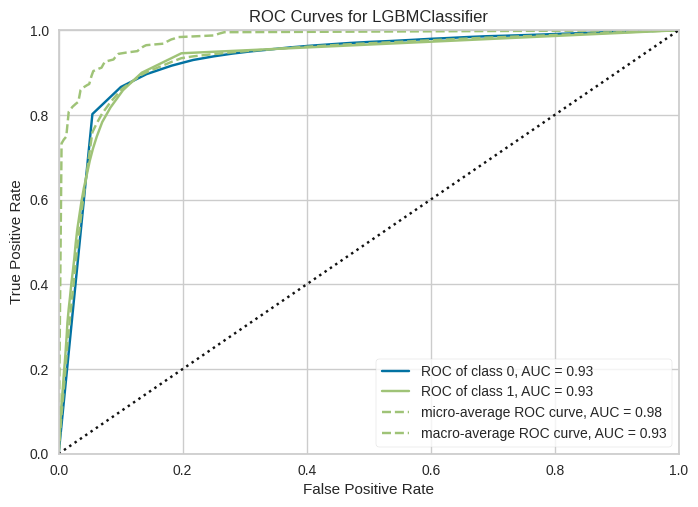

In [ ]:
plot_model(tuned_best_model, plot = 'auc')
#number for roc curves and categorization to poor to good to great

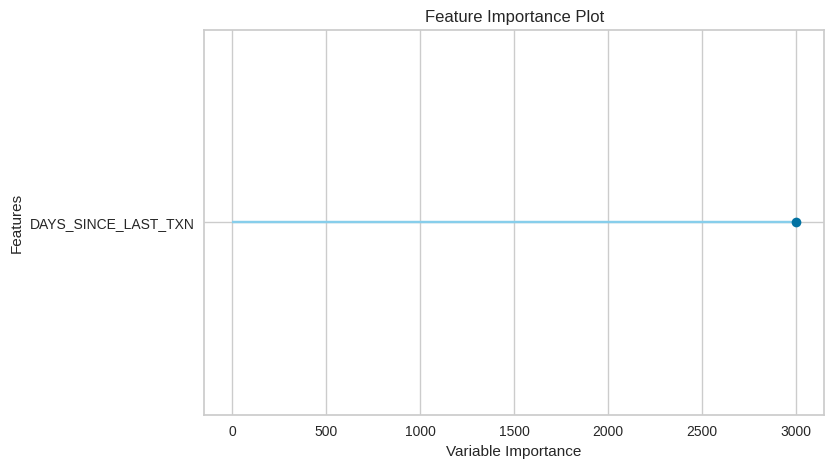

In [ ]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')
# print top 1 feature categorical

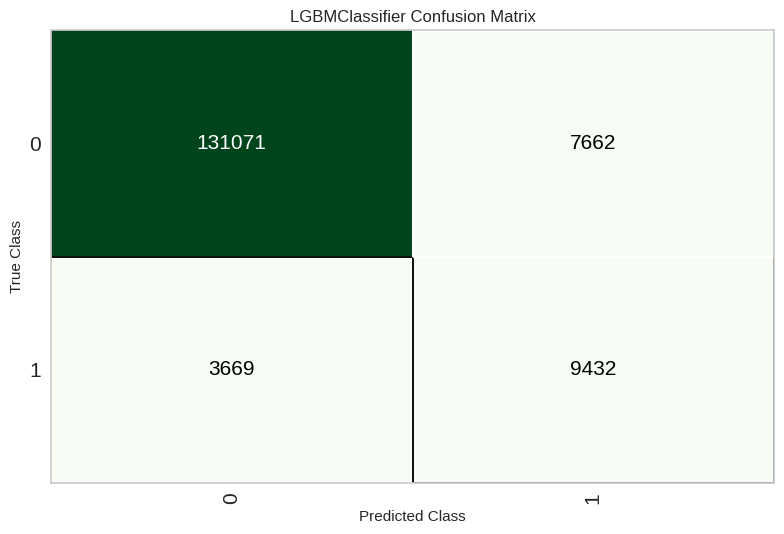

In [ ]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')
# add cm for test along this

In [ ]:
predictions = predict_model(tuned_best_model, data=test_data, probability_threshold=0.33)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9216,0.9088,0.6700,0.8384,0.7448,0.6992,0.7053


In [ ]:
save_model(tuned_best_model, 'saved_tuned_best_model_churn_prediction')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ACTUAL_AMOUNT',
                                              'DAYS_SINCE_LAST_TXN',
                                              'EFFICIENCY',
                                              'PREVIOUS_CHURN_INCIDENTS',
                                              'TOTAL_POS_COUNT', 'TXN_COUNT'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                  

In [ ]:
from pycaret.classification import *
test_data_oct = pd.read_csv(r"/content/drive/MyDrive/Geidea/Churn Model /Untitled folder/Churn Data 2nd approach 10.2023.csv")

In [ ]:
test_data_oct['MONTH'] = test_data_oct['MONTH'].astype('datetime64[ns]')
test_data_oct = test_data_oct[test_data_oct['MONTH'].dt.to_period('M')== pd.Period('2023-9')]
test_data_oct.head()

,index(),COALESCE_ORGS,BUSINESSTYPE,BUSINESS_DOMAIN,ACTUAL_AMOUNT,DAYS_SINCE_LAST_TXN,EFFICIENCY,PREVIOUS_CHURN_INCIDENTS,TOTAL_POS_COUNT,TXN_COUNT,CHURNED,MONTH,MAX_DATE,LAST_CHURN_MONTH
53,54,0a0f6b0f-ef04-4132-8443-79fbc2305678,LIMITED,Tailors,1645.00,0.0,0.93,0.0,2.0,68.0,0,2023-09-01,9/30/2023 0:00,NaN
159,160,0a1fd4bf-9644-40af-90a2-211fe1983688,LIMITED,Fast Food Restaurants,15831.00,0.0,0.93,1.0,1.0,1716.0,0,2023-09-01,9/30/2023 0:00,NaN
186,187,0a2e40af-050c-42b9-8343-741408d7defe,LIMITED,"Laundry, Cleaning, & Garment Services",13158.00,0.0,0.93,0.0,1.0,815.0,0,2023-09-01,9/30/2023 0:00,NaN
204,205,0a2f517a-e681-4fdd-90fc-fa71d60b57f2,LIMITED,"Fuel Dealers - Fuel, Oil, Wood, Coal, Liquefie...",85743.65,0.0,0.93,0.0,2.0,5899.0,0,2023-09-01,9/30/2023 0:00,NaN
241,242,0a4a5b75-0af2-4945-a564-11e47caa3477,LIMITED,"Cafes, Restaurants",NaN,0.0,NaN,1.0,1.0,NaN,1,2023-09-01,9/30/2023 0:00,NaN


In [ ]:
pretraied = load_model('saved_tuned_best_model_churn_prediction')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
predictions_oct = predict_model(pretraied, data=test_data_oct, probability_threshold=0.3)

In [ ]:
predictions_oct.head()

,index(),COALESCE_ORGS,BUSINESSTYPE,BUSINESS_DOMAIN,ACTUAL_AMOUNT,DAYS_SINCE_LAST_TXN,EFFICIENCY,PREVIOUS_CHURN_INCIDENTS,TOTAL_POS_COUNT,TXN_COUNT,MONTH,MAX_DATE,LAST_CHURN_MONTH,CHURNED,prediction_label,prediction_score
53,54,0a0f6b0f-ef04-4132-8443-79fbc2305678,LIMITED,Tailors,1645.000000,0.0,0.93,0.0,2.0,68.0,2023-09-01,9/30/2023 0:00,NaN,0,0,0.9822
159,160,0a1fd4bf-9644-40af-90a2-211fe1983688,LIMITED,Fast Food Restaurants,15831.000000,0.0,0.93,1.0,1.0,1716.0,2023-09-01,9/30/2023 0:00,NaN,0,0,0.9822
186,187,0a2e40af-050c-42b9-8343-741408d7defe,LIMITED,"Laundry, Cleaning, & Garment Services",13158.000000,0.0,0.93,0.0,1.0,815.0,2023-09-01,9/30/2023 0:00,NaN,0,0,0.9822
204,205,0a2f517a-e681-4fdd-90fc-fa71d60b57f2,LIMITED,"Fuel Dealers - Fuel, Oil, Wood, Coal, Liquefie...",85743.648438,0.0,0.93,0.0,2.0,5899.0,2023-09-01,9/30/2023 0:00,NaN,0,0,0.9822
241,242,0a4a5b75-0af2-4945-a564-11e47caa3477,LIMITED,"Cafes, Restaurants",NaN,0.0,NaN,1.0,1.0,NaN,2023-09-01,9/30/2023 0:00,NaN,1,0,0.9822


In [ ]:
predictions_oct.to_csv('/content/drive/MyDrive/Geidea/Churn Model /Untitled folder/predictions.10.2023.V2.csv', index=False)